<a href="https://colab.research.google.com/github/ItsYoussefElshemy/selected-project/blob/main/malaria_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!unzip /content/drive/MyDrive/malaria-cell-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
  inflating: cell_images/cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
  inflating: cell_i

In [8]:
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
np.random.seed(1000)
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
%matplotlib inline

In [20]:
train_data=os.listdir("/content/cell_images") 


parasitized_data = os.listdir("/content/cell_images/Parasitized") #Load Dataset
print(parasitized_data[:5])

['C164P125ThinF_IMG_20151116_120135_cell_141.png', 'C97P58ThinF_IMG_20150917_152437_cell_11.png', 'C130P91ThinF_IMG_20151004_141341_cell_153.png', 'C132P93ThinF_IMG_20151004_151811_cell_155.png', 'C46P7ThinF_IMG_20151130_210309_cell_161.png']


In [21]:
uninfected_data = os.listdir("/content/cell_images/Uninfected")#Load Dataset

print(uninfected_data[:5])

['C238NThinF_IMG_20151207_114653_cell_95.png', 'C149P110ThinF_IMG_20151115_114555_cell_259.png', 'C170P131ThinF_IMG_20151119_120111_cell_38.png', 'C134P95ThinF_IMG_20151005_121425_cell_53.png', 'C148P109ThinF_IMG_20151115_112253_cell_71.png']


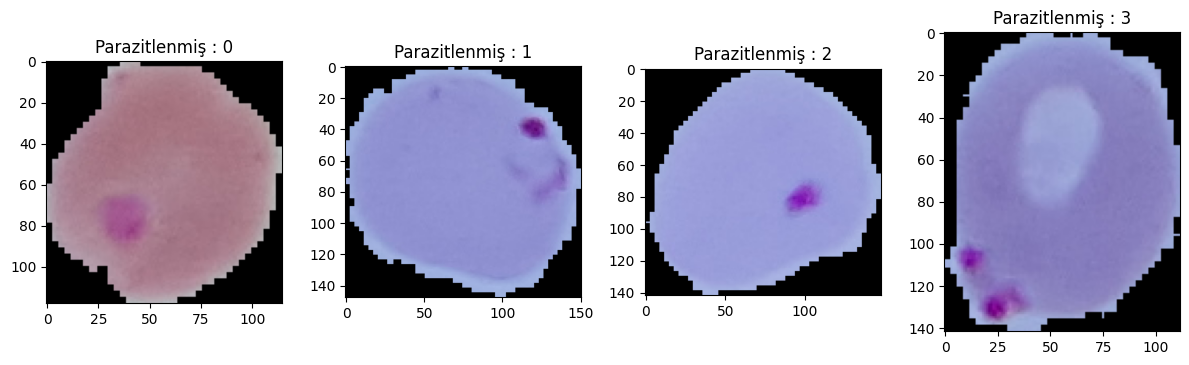

In [27]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread("/content/cell_images/Parasitized" + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parazitlenmiş : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

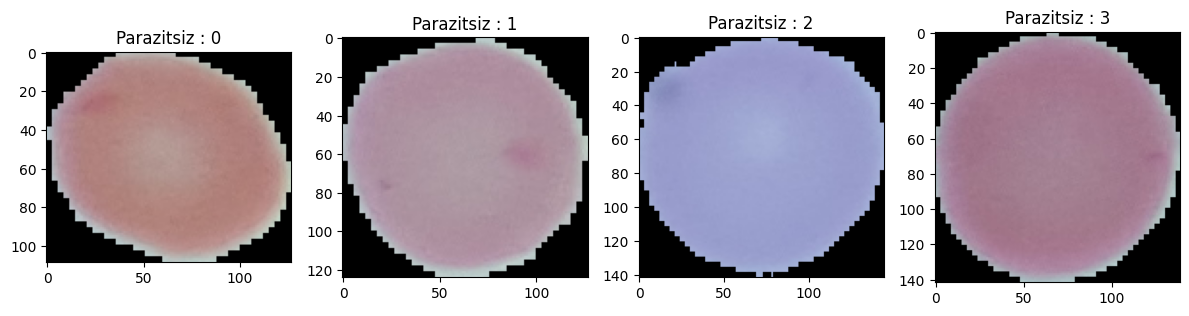

In [28]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread("/content/cell_images/Uninfected" + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Parazitsiz : {i}'.format(i=i))
    plt.tight_layout()
plt.show()

In [29]:
from pathlib import Path
import pathlib
data_dir = pathlib.Path("/content/cell_images")

In [49]:
batch_size = 128
img_height = 150
img_width = 150

In [80]:
import tensorflow as tf
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 55116 files belonging to 3 classes.
Using 44093 files for training.


In [81]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 55116 files belonging to 3 classes.
Using 11023 files for validation.


In [82]:
gruplama = train_ds.class_names
print(gruplama)

['Parasitized', 'Uninfected', 'cell_images']


In [89]:
from keras import layers 
num_classes=len(gruplama)
print(num_classes)

from keras.models import Sequential

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',metrics=['accuracy'])


3


In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 37, 37, 32)        0

In [91]:
tf.keras.backend.clear_session() 

In [67]:
tf.keras.backend.clear_session() 

In [103]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(MODEL_PATH,
                            save_weights_only=True,
                            save_best_only=True,
                            verbose=1)
epochs = 30
history = model.fit(train_ds, validation_data=val_ds,epochs=epochs, verbose=1)

Epoch 1/30
345/345 [==============================] - 62s 177ms/step - loss: -8716195893084160.0000 - accuracy: 0.2505 - val_loss: -9916302097383424.0000 - val_accuracy: 0.2479
Epoch 2/30
345/345 [==============================] - 62s 179ms/step - loss: -11752270693662720.0000 - accuracy: 0.2505 - val_loss: -13212024850874368.0000 - val_accuracy: 0.2479
Epoch 3/30
345/345 [==============================] - 61s 175ms/step - loss: -15486851057975296.0000 - accuracy: 0.2505 - val_loss: -17241372041936896.0000 - val_accuracy: 0.2479
Epoch 4/30
345/345 [==============================] - 60s 173ms/step - loss: -20013688605900800.0000 - accuracy: 0.2505 - val_loss: -22092167161839616.0000 - val_accuracy: 0.2479
Epoch 5/30
345/345 [==============================] - 62s 177ms/step - loss: -25421408913850368.0000 - accuracy: 0.2505 - val_loss: -27859047667466240.0000 - val_accuracy: 0.2479
Epoch 6/30
345/345 [==============================] - 60s 172ms/step - loss: -31833107892011008.0000 - accu

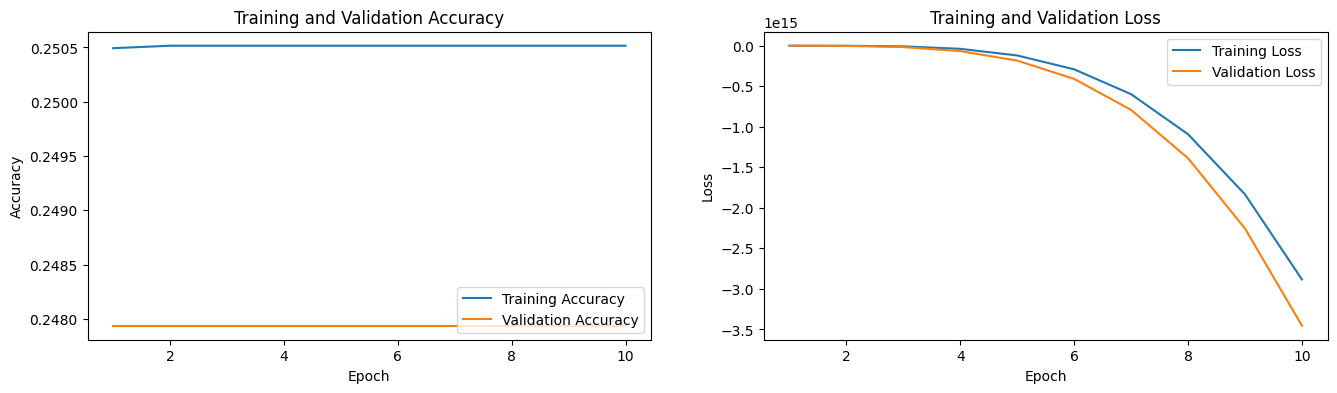

In [97]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

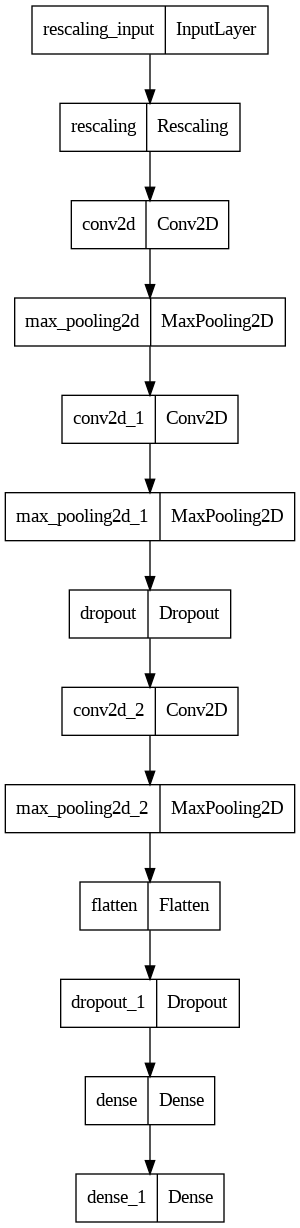

In [109]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)